In [0]:
pip install hyperopt

In [0]:
pip install catboost

In [0]:
#import 
import numpy as np
import pandas as pd
import hyperopt
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import Train Data with  next cell

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_values.csv to train_values.csv
User uploaded file "train_values.csv" with length 42171102 bytes


In [0]:
train = pd.read_csv("train_values.csv")
train.shape

(500000, 23)

In [0]:
train.describe(include='all')

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000,500000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299974,NaN
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,2.036228,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,NaN,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,0.511351,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,NaN,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,NaN,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,NaN,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,NaN,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,NaN,1.000000


In [0]:
submission = pd.DataFrame(train.describe(include='all'))

Import train Label

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_labels.csv to train_labels.csv
User uploaded file "train_labels.csv" with length 4388906 bytes


In [0]:
train_label = pd.read_csv("train_labels.csv")
train_label.shape
y = train_label.drop(["row_id"],axis=1)

In [0]:
y.shape

(500000, 1)

Import Test Data

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_values.csv to test_values.csv
User uploaded file "test_values.csv" with length 46996930 bytes


In [0]:
testn = pd.read_csv("test_values.csv")
test = testn.drop(["row_id"], axis=1)
test.shape

(500000, 21)

In [0]:
x = train
x = x.drop(["row_id"], axis=1)
x.shape
y.shape

(500000, 1)

In [0]:
x.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

In [0]:
x['ena_1'] =( x['loan_amount']/ x['applicant_income'])
test['ena_1'] =( test['loan_amount']/ test['applicant_income'])
x['ena_2'] =( x['loan_amount']/ x['ffiecmedian_family_income'])
test['ena_2'] =( test['loan_amount']/ test['ffiecmedian_family_income'])

In [0]:
x['ena_3'] =pd.qcut(x['loan_amount'],5,labels=False)
x['ena_4'] =pd.qcut(x['msa_md'],5,labels=False)
x['ena_5'] =pd.qcut(x['applicant_income'],5,labels=False)
x['ena_6'] =pd.qcut(x['population'],5,labels=False)
#x['ena_7'] =pd.qcut(x['minority_population_pct'],5,labels=False)
x['ena_8'] =pd.qcut(x['ffiecmedian_family_income'],5,labels=False)
#x['ena_9'] =pd.qcut(x['tract_to_msa_md_income_pct'],5,labels=False)
x['ena_10'] =pd.qcut(x['number_of_owner-occupied_units'],5,labels=False)
x['ena_11'] =pd.qcut(x['number_of_1_to_4_family_units'],5,labels=False)
test['ena_3'] =pd.qcut(test['loan_amount'],5,labels=False)
test['ena_4'] =pd.qcut(test['msa_md'],5,labels=False)
test['ena_5'] =pd.qcut(test['applicant_income'],5,labels=False)
test['ena_6'] =pd.qcut(test['population'],5,labels=False)
#test['ena_7'] =pd.qcut(test['minority_population_pct'],5,labels=False)
test['ena_8'] =pd.qcut(test['ffiecmedian_family_income'],5,labels=False)
#test['ena_9'] =pd.qcut(test['tract_to_msa_md_income_pct'],5,labels=False)
test['ena_10'] =pd.qcut(test['number_of_owner-occupied_units'],5,labels=False)
test['ena_11'] =pd.qcut(test['number_of_1_to_4_family_units'],5,labels=False)



In [0]:
cate_features_index = np.where(x.dtypes != float)[0]

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

In [0]:
model = CatBoostClassifier(iterations=500, depth=15, learning_rate=0.01,eval_metric='Accuracy',use_best_model=True, random_seed=50)

In [0]:
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.7110612	test: 0.7081067	best: 0.7081067 (0)	total: 14.3s	remaining: 1h 58m 48s
1:	learn: 0.7156471	test: 0.7125200	best: 0.7125200 (1)	total: 29.3s	remaining: 2h 1m 28s
2:	learn: 0.7174941	test: 0.7140800	best: 0.7140800 (2)	total: 43.7s	remaining: 2h 34s
3:	learn: 0.7187812	test: 0.7157733	best: 0.7157733 (3)	total: 58.4s	remaining: 2h 42s
4:	learn: 0.7195106	test: 0.7164267	best: 0.7164267 (4)	total: 1m 13s	remaining: 2h 48s
5:	learn: 0.7197129	test: 0.7172533	best: 0.7172533 (5)	total: 1m 28s	remaining: 2h 56s
6:	learn: 0.7201082	test: 0.7181333	best: 0.7181333 (6)	total: 1m 43s	remaining: 2h 1m 16s
7:	learn: 0.7198706	test: 0.7181600	best: 0.7181600 (7)	total: 1m 57s	remaining: 2h 9s
8:	learn: 0.7211271	test: 0.7182800	best: 0.7182800 (8)	total: 2m 13s	remaining: 2h 1m 8s
9:	learn: 0.7212282	test: 0.7180933	best: 0.7182800 (8)	total: 2m 28s	remaining: 2h 1m 37s
10:	learn: 0.7210047	test: 0.7180667	best: 0.7182800 (8)	total: 2m 43s	remaining: 2h 1m 24s
11:	learn: 0.72118

KeyboardInterrupt: ignored

In [0]:
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest, model.predict(xtest))))

CatBoostError: ignored

In [0]:
pred = model.predict(test)
pred = pred.astype(np.int)
submission = pd.DataFrame({'row_id':testn['row_id'],'accepted':pred})

In [0]:
submission.to_csv('Result.csv',index=False)

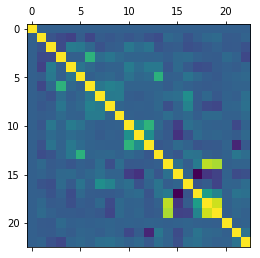

In [0]:
import matplotlib.pyplot as plt

plt.matshow(train.corr())
plt.show()

In [0]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
row_id,1,0.0027,-0.00025,0.0015,-0.0021,-0.0026,0.001,0.0005,0.00055,-0.0016,-0.0031,-0.0024,-0.0027,-0.00091,-0.0012,-0.00033,0.00027,0.0021,-0.00033,-0.00072,-0.0013,0.0012,0.00043
loan_type,0.0027,1,-0.065,-0.12,-0.16,-0.019,-0.13,-0.024,-0.047,-0.016,-0.05,-0.017,-0.072,-0.1,0.044,0.017,-0.07,-0.0083,0.037,0.054,-0.027,-0.026,0.019
property_type,-0.00025,-0.065,1,-0.11,0.16,0.14,0.046,-0.076,-0.018,-0.0074,0.13,0.063,0.11,-0.068,-0.027,-0.015,-0.093,-0.067,-0.029,0.0059,-0.036,-0.03,-0.081
loan_purpose,0.0015,-0.12,-0.11,1,0.0022,-0.0028,0.49,0.073,0.12,0.058,0.023,0.022,0.014,0.02,-0.013,0.043,0.057,0.0041,-0.017,-0.024,0.052,0.013,-0.13
occupancy,-0.0021,-0.16,0.16,0.0022,1,0.11,0.044,-0.012,0.012,0.0081,0.16,0.067,0.13,0.13,-0.053,0.048,-0.026,-0.1,-0.09,-0.021,-0.0013,-0.017,0.022
loan_amount,-0.0026,-0.019,0.14,-0.0028,0.11,1,-0.0018,0.027,0.047,0.0033,0.099,0.037,0.062,0.48,0.0001,0.0072,0.11,0.044,-0.014,-0.037,0.011,0.026,0.046
preapproval,0.001,-0.13,0.046,0.49,0.044,-0.0018,1,0.13,0.18,0.16,0.017,0.019,0.019,0.022,-0.019,0.036,0.0059,-0.017,-0.027,-0.018,0.00056,0.014,0.017
msa_md,0.0005,-0.024,-0.076,0.073,-0.012,0.027,0.13,1,0.15,0.16,-0.012,-0.025,0.005,0.036,0.065,0.082,0.27,-0.022,0.042,-0.042,0.014,-0.0045,0.08
state_code,0.00055,-0.047,-0.018,0.12,0.012,0.047,0.18,0.15,1,0.02,-0.0015,0.0043,-0.0019,0.037,-0.091,0.014,0.2,-0.027,-0.11,-0.14,0.02,0.03,0.091
county_code,-0.0016,-0.016,-0.0074,0.058,0.0081,0.0033,0.16,0.16,0.02,1,0.0056,-0.0036,-0.00049,0.011,0.071,0.018,0.049,-0.014,0.05,0.053,0.0028,0.0037,0.053


In [0]:
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

NameError: ignored